# Used Car Analysis & Price Prediction Dataset

This dataset contains information about used cars, such as:
- brand	
- model	
- year	
- transmission	
- mileage	
- fuelType	
- tax	
- mpg	
- engineSize	
- price

MPG stands for Miles Per Gallon. It is a unit of measurement used to quantify the fuel efficiency of a vehicle. Specifically, it represents the number of miles a vehicle can travel on one gallon of fuel. The higher the MPG value, the more fuel-efficient the vehicle is, as it can travel more miles per unit of fuel consumed.

For example, if a car has an MPG rating of 30, it means the car can travel 30 miles on one gallon of fuel. Fuel efficiency is an important factor for consumers when considering the environmental impact and cost of operating a vehicle. It's commonly used in the United States and some other countries to provide a standardized measure of a car's fuel efficiency.

## Importing Libraries

In [179]:
# Import packages
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

## Importing Dataset

In [180]:
# Reading the csv file cars.csv
df = pd.read_csv('Documents/used_cars_csv/cars.csv')

## Analysing Dataset

In [181]:
# Looking at the first 5 rows of our data
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300


### Observation:
- You can see that not all the columns are in int or float data types.
- Here price column is outcome feature to predict

In [182]:
# Looking at the last 5 rows of our data
df.tail()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
46147,Toyota,IQ,2011,Automatic,30000,Petrol,20,58.9,1.0,5500
46148,Toyota,Urban Cruiser,2011,Manual,36154,Petrol,125,50.4,1.3,4985
46149,Toyota,Urban Cruiser,2012,Manual,46000,Diesel,125,57.6,1.4,4995
46150,Toyota,Urban Cruiser,2011,Manual,60700,Petrol,125,50.4,1.3,3995
46151,Toyota,Urban Cruiser,2011,Manual,45128,Petrol,125,50.4,1.3,4495


In [183]:
# Looking at the shape of our data
print('Number of rows:', df.shape[0])
print('Number of column:', df.shape[1])

Number of rows: 46152
Number of column: 10


In [184]:
# Looking at the basic info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46152 entries, 0 to 46151
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         46152 non-null  object 
 1   model         46152 non-null  object 
 2   year          46152 non-null  int64  
 3   transmission  46152 non-null  object 
 4   mileage       46152 non-null  int64  
 5   fuelType      46152 non-null  object 
 6   tax           46152 non-null  int64  
 7   mpg           46152 non-null  float64
 8   engineSize    46152 non-null  float64
 9   price         46152 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.5+ MB


### Observation:
- You can see that there are no missing rows in the entire dataset. So we do not need to fill/drop any value
- Columns of object datatype (String):
  - brand
  - model
  - transmission
  - fuelType
- Columns of int64 datatype:
  - year
  - price
  - mileage
  - tax
- Columns of float64 datatype:
  - mpg
  - engineSize

In [185]:
# Looking at all unique values of 4 columns of object datatype (String)
print(df.brand.unique(), end='\n\n')
print(df.model.unique(), end='\n\n')
print(df.transmission.unique(), end='\n\n')
print(df.fuelType.unique(), end='\n\n')

['Audi' 'BMW' 'Ford' 'Toyota']

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' GT86'
 ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius' ' Avensis'
 ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra' ' Camry'
 ' Verso-S' ' IQ' ' Urban Cruiser']

['Manual' 'Automatic' 'Semi-Auto' 'Other']

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']



### Observation:
- We have 4 unique brands:
  - Audi
  - BMW
  - Ford
  - Toyota
- There are many car models
- We have 4 unique transmission types:
  - Manual
  - Automatic
  - Semi-Auto
  - Other
- We have 5 unique fuelType types:
  - Petrol
  - Diesel
  - Hybrid
  - Other
  - Electric

In [186]:
# Looking at the description of our data
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,46152.000000,46152.000000,46152.000000,46152.000000,46152.000000,46152.000000
mean,2016.953003,24126.385162,117.834438,56.654754,1.693290,17211.224042
std,2.176703,21848.625930,66.080120,18.953835,0.611737,10200.905956
min,1996.000000,1.000000,0.000000,2.800000,0.000000,495.000000
25%,2016.000000,7835.000000,125.000000,47.900000,1.200000,10298.000000
50%,2017.000000,18454.500000,145.000000,56.500000,1.600000,14799.000000
75%,2019.000000,33477.250000,145.000000,64.200000,2.000000,20995.000000
max,2060.000000,323000.000000,580.000000,470.800000,6.600000,145000.000000


### Observation

- Year of Manufacture:
  - The data ranges from the year 1996 to an unusual maximum value of 2060. 
  - The maximum year seems erroneous, as it is likely a typo or data entry error.
- Mileage:
  - The average mileage is around 24,217 miles
  - With a wide range from 1 mile to a maximum of 323,000 miles.
- Tax:
  - The average tax is approximately £117.74
  - With a minimum tax of 0 and a maximum of 580. 
  - There may be some outliers in the tax values.
- MPG (Miles Per Gallon):
  - The average fuel efficiency is approximately 56.7 mpg
  - With values ranging from 2.8 mpg to 470.8 mpg.
- Engine Size:
  - The average engine size is approximately 1.69 liters
  - With a minimum size of 0 liters (possibly a data entry error) and a maximum of 6.6 liters.
- Price:
  - The average car price is approximately £17,183. 
  - The prices vary widely, with a minimum value of £495 and a maximum of £145,000.

### Conclusion
- It's important to note that the dataset may require further cleaning and validation, especially considering the anomalous maximum year and minimum engine size. Additionally, the presence of outliers in tax and mileage values may also need to be addressed.

## Preprocessing

In [187]:
# Checking for missing values
df.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

### Observation:
- There are no missing values.

In [188]:
# Checking for duplicates
df.duplicated().sum()

413

### Observation:
- There are duplicate values.

In [189]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [190]:
# Checking for duplicates again
df.duplicated().sum()

0

In [191]:
# Looking at the string columns of our data
df.select_dtypes(include=['object']).head()

,brand,model,transmission,fuelType
0,Audi,A1,Manual,Petrol
1,Audi,A6,Automatic,Diesel
2,Audi,A1,Manual,Petrol
3,Audi,A4,Automatic,Diesel
4,Audi,A3,Manual,Petrol


In [192]:
# Looking at the number columns of our data
df.select_dtypes(include=['number']).head()

,year,mileage,tax,mpg,engineSize,price
0,2017,15735,150,55.4,1.4,12500
1,2016,36203,20,64.2,2.0,16500
2,2016,29946,30,55.4,1.4,11000
3,2017,25952,145,67.3,2.0,16800
4,2019,1998,145,49.6,1.0,17300


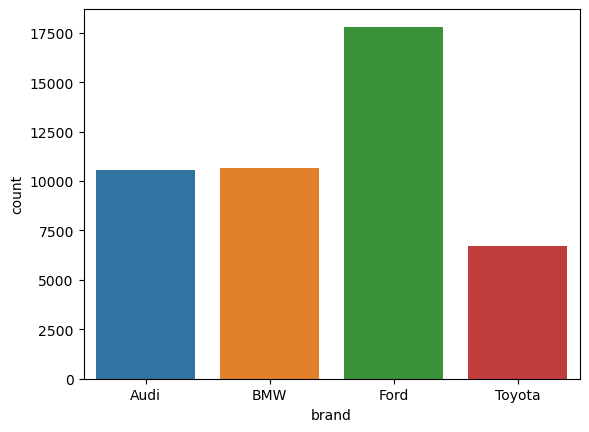

In [193]:
# Looking at the distribution of car brands
p = sns.countplot(data=df, x="brand")

### Observation:
- Dataset contains around the equal amount of Audi and BMW models slighly above 10000 for each
- Ford dominates the dataset with the amount of slightly above 17500 models
- And Toyota ends the list with amount of around 7000 models

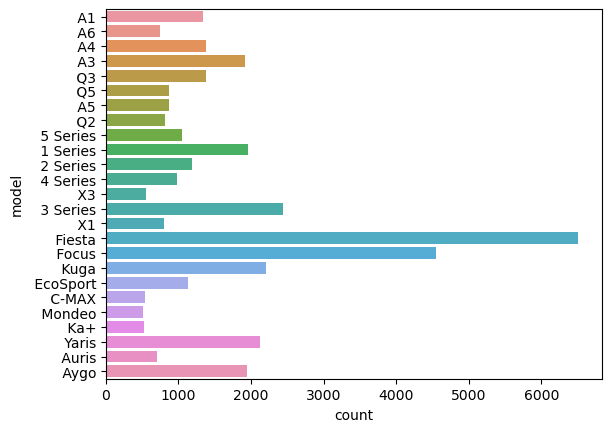

In [194]:
# Looking at the distribution of N most popular car models
top_n = 25  # Set the number of most popular car models you want to include

# Get the counts for each model
model_counts = df['model'].value_counts()

# Select the top N most popular models
top_models = model_counts.head(top_n).index

# Filter the DataFrame to include only the top models
df_top_models = df[df['model'].isin(top_models)]

# Create the count plot
p = sns.countplot(data=df_top_models, y="model")

### Observation:
- Dataset contains many different car models, thats why we only included 25 to see which models are preferred most of the mines, otherwise the plot would be impossible to read
- Fiesta dominates the dataset with the amount of slightly above 6000 models
- Focus is taking the second place with 4500 models
- And 3 series ends up in the 3rd place with around 2200 models

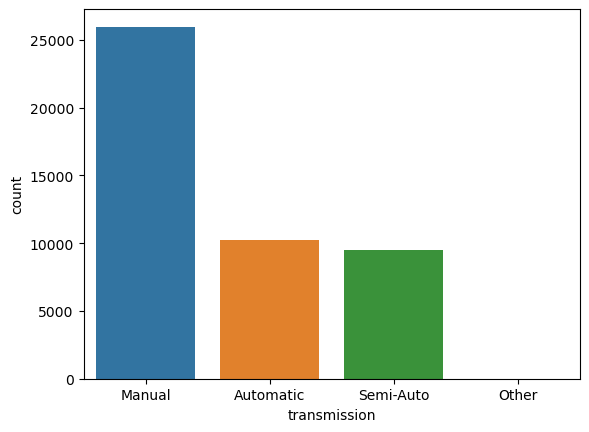

In [195]:
# Looking at the distribution of transmission types
p = sns.countplot(data=df, x="transmission")

### Observation:
- Manual transmission is used in more than half the cars in the entire dataset, 25500 manual cars
- Automatic and Semi-Auto are used twice as less and more. Around 10000 for each
- Other types are very rarely being used

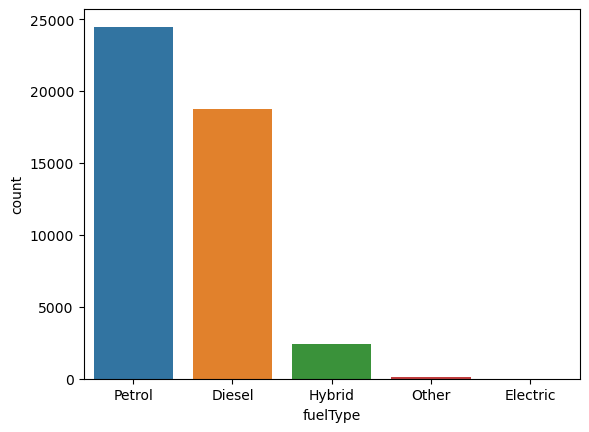

In [196]:
# Looking the distribution of fuel types
p = sns.countplot(data=df, x="fuelType")

### Observation:
- Petrol and Diesel cars are most popular. 
- Almost 25000 petrol car models and 18500 Diesel models
- Our dataset doesn't contain many Hybrid cars and almost none Electric and other types

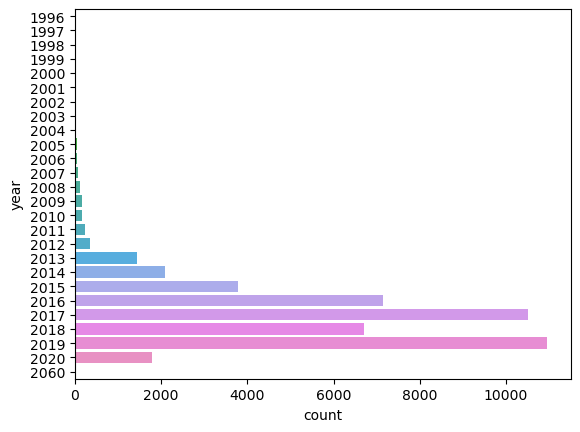

In [197]:
# Looking at the distribution of the cars' year production
p = sns.countplot(data=df, y="year")

### Observation:
- We can see that vast majority of cars are produced from 2016 to 2019

<Axes: xlabel='mileage', ylabel='Count'>

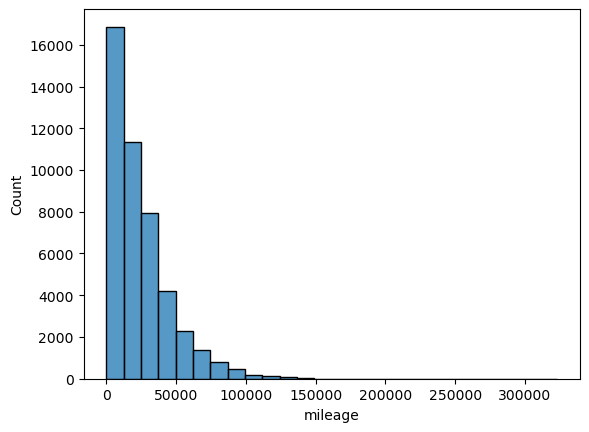

In [198]:
# Looking at the distribution of the cars' mileages
sns.histplot(df['mileage'], bins=26)

### Observation:
- Using the histogram we can see that most car models have very small mileage with 16000 models ranging from 0 to 12500 miles
- And as we go farther and increase the mileage, the count of cars decreases geometrically

<Axes: xlabel='tax', ylabel='Count'>

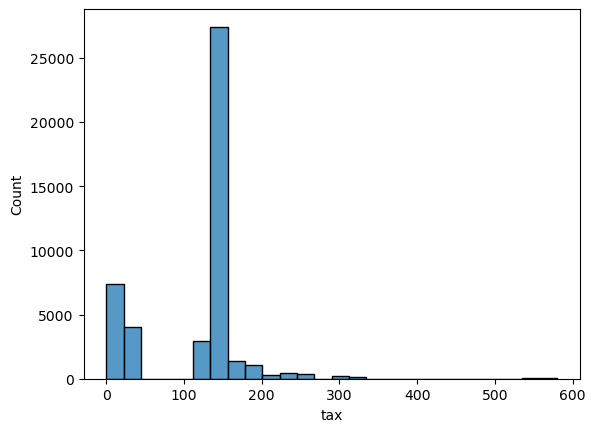

In [199]:
# Looking the distribution of the cars' taxes
sns.histplot(df['tax'], bins=26)

### Observation:
- Most of the cars' taxes are placed between 120 and 150.
- And the second largest group are taxes from 0 to 50.
- The rest of data is almsot negligible

<Axes: xlabel='mpg', ylabel='Count'>

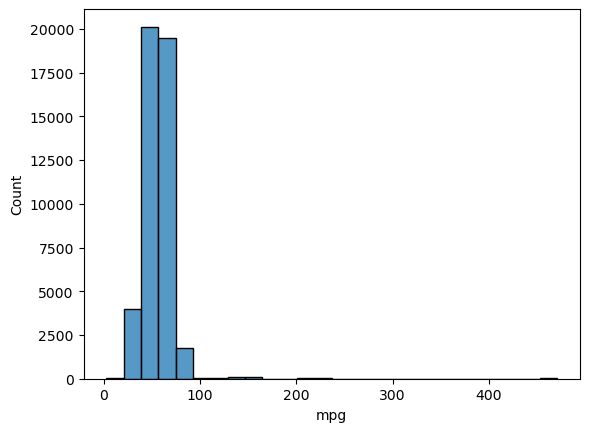

In [200]:
# Looking at the distribution of the cars' mpgs
sns.histplot(df['mpg'], bins=26)

### Observation:
- The mpg is centered mostly in values between 140 and 180

<Axes: xlabel='engineSize', ylabel='Count'>

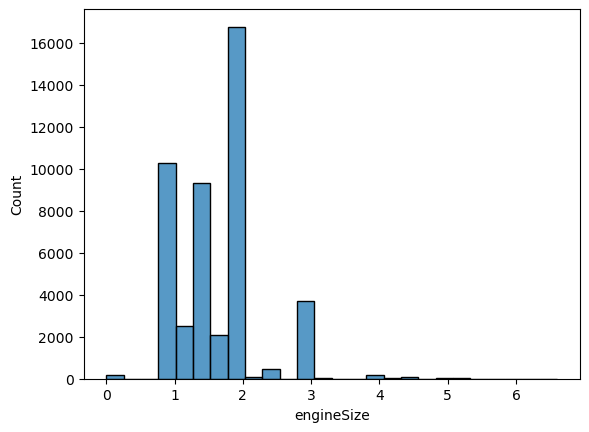

In [201]:
# Looking at the distribution of the cars' engine sizes
sns.histplot(df['engineSize'], bins=26)

### Observation:
- Engine sizes are quite interesting to anylize, they vary a lot
- Most of engine sizes are in range from 0.8l to 2l. 
- But amount of engine with 1.8l to 2.0l has almost the same amount as from 0.8l to 1l and 1.25l to 1.5l combined
- Also a big part is placed in range from 2.8l to 3l

<Axes: xlabel='price', ylabel='Count'>

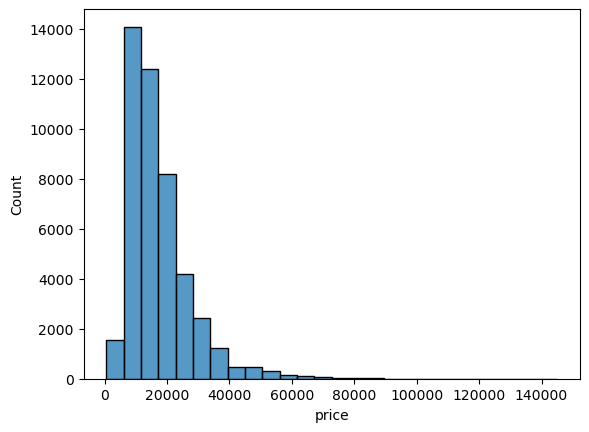

In [202]:
# Looking at the distribution of the cars' prices
sns.histplot(df['price'], bins=26)

### Observation:
- Most car models have prices varying from 4000 to 10000
- And we can clearly see that the higher price of the car is the less variants of car models we can find

<Axes: xlabel='year'>

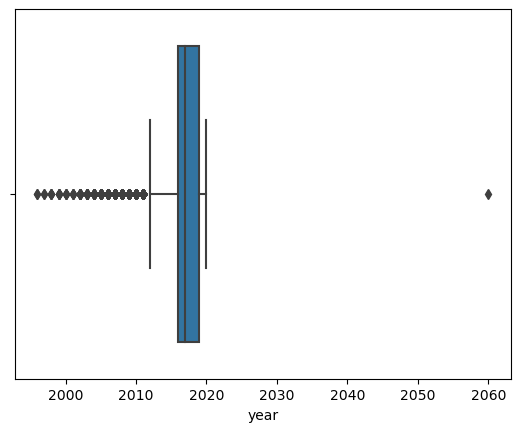

In [203]:
# Looking at the central tendency and spread of the cars' year production, as well as the presence of any outliers
sns.boxplot(x=df['year'])

## Observation:
- The data ranges from the year 1996 to an unusual maximum value of 2060
- The maximum year seems erroneous, as it is likely a typo or data entry error

<Axes: xlabel='mileage'>

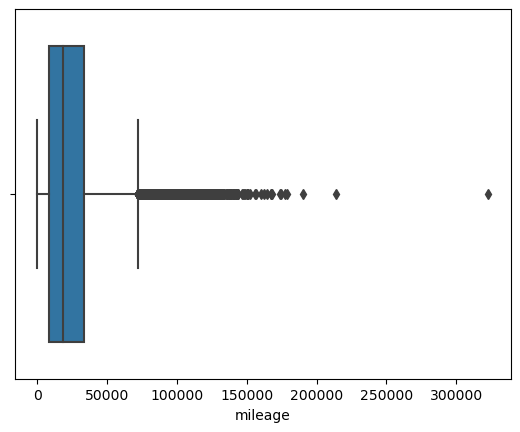

In [204]:
# Looking at the central tendency and spread of the cars' mileages, as well as the presence of any outliers
sns.boxplot(x=df['mileage'])

## Observation:
- The average mileage is around 24000 miles
- Wide range from 1 mile to a maximum of 323000 miles
- There is definetely some outliers 

<Axes: xlabel='tax'>

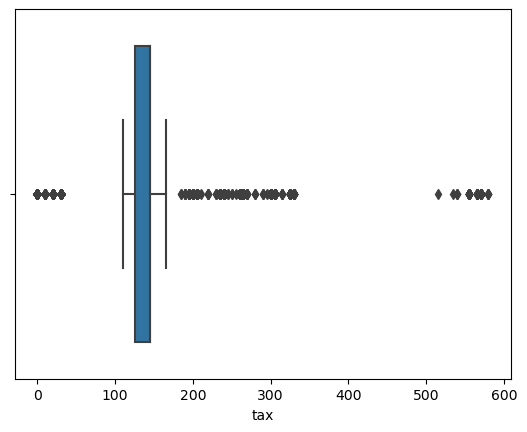

In [205]:
# Looking at the central tendency and spread of the cars' taxes, as well as the presence of any outliers
sns.boxplot(x=df['tax'])

## Observation
- The average tax is approximately £120
- With a minimum tax of 0 and a maximum of 580.
- There are some outliers in the tax values

<Axes: xlabel='mpg'>

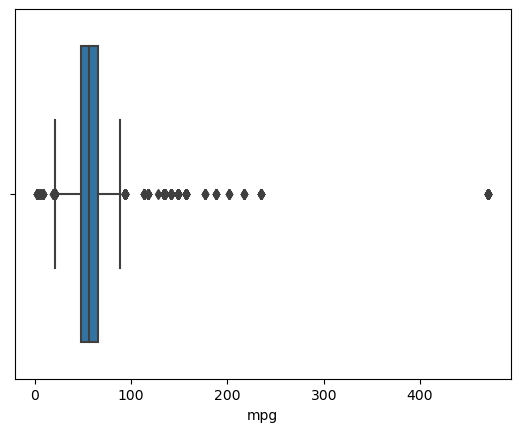

In [206]:
# Looking at the central tendency and spread of the cars' mpgs, as well as the presence of any outliers
sns.boxplot(x=df['mpg'])

## Observation
- The average fuel efficiency is approximately 56 mpg
- With values ranging a lot.
- We can see that are outliers that need to be removed

<Axes: xlabel='engineSize'>

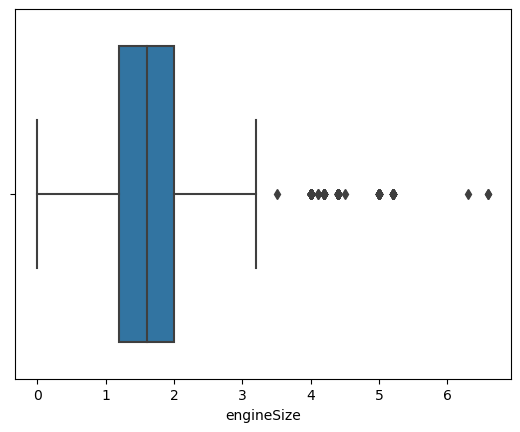

In [207]:
# Looking at the central tendency and spread of the cars' engine sizes, as well as the presence of any outliers
sns.boxplot(x=df['engineSize'])

## Observation
- Not many outliers
- With a minimum size of 0 liters (possibly a data entry error) 

<Axes: xlabel='price'>

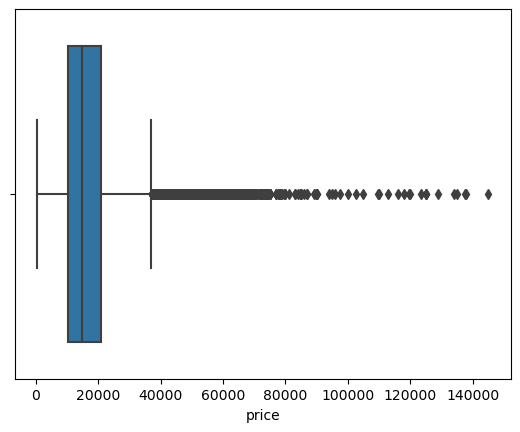

In [208]:
# Looking at the central tendency and spread of the cars' prices, as well as the presence of any outliers
sns.boxplot(x=df['price'])

## Observation
- The prices vary widely, with a minimum value of £495 and a maximum of £145,000.
- Probably the outliers would not be removed
- Even though majority of cars are outliers, there are still lot of them

# Removing Outliers using IQR (Interquartile Range) Method:

In [209]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_year = df['year'].quantile(0.25)
Q3_year = df['year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

df = df[(df['year'] > Q1_year - 1.5 * IQR_year) & (df['year'] < Q3_year + 1.5 * IQR_year)]

<Axes: xlabel='year'>

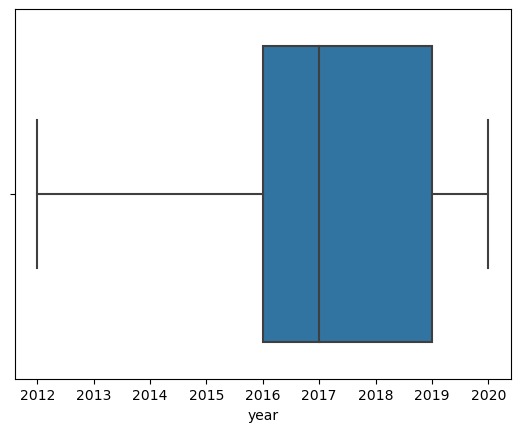

In [210]:
# Looking at the central tendency and spread of the cars' year production after applying IQR
sns.boxplot(x=df['year'])

In [211]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_mileage = df['mileage'].quantile(0.25)
Q3_mileage = df['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

df = df[(df['mileage'] > Q1_mileage - 1.5 * IQR_mileage) & (df['mileage'] < Q3_mileage + 1.5 * IQR_mileage)]

<Axes: xlabel='mileage'>

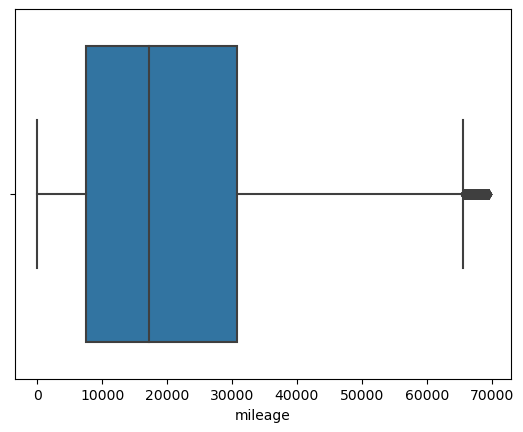

In [212]:
# Looking at the central tendency and spread of the cars' mileages after applying IQR
sns.boxplot(x=df['mileage'])

In [213]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_tax = df['tax'].quantile(0.25)
Q3_tax = df['tax'].quantile(0.75)
IQR_tax = Q3_tax - Q1_tax

# df = df[(df['tax'] > Q1_tax - 1.5 * IQR_tax) & (df['tax'] < Q3_tax + 1.5 * IQR_tax)]

<Axes: xlabel='tax'>

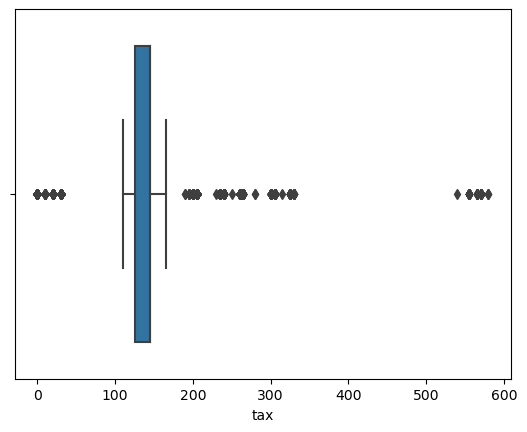

In [214]:
# Looking at the central tendency and spread of the cars' taxes after applying IQR
sns.boxplot(x=df['tax'])

In [215]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_mpg = df['mpg'].quantile(0.25)
Q3_mpg = df['mpg'].quantile(0.75)
IQR_mpg = Q3_mpg - Q1_mpg

df = df[(df['mpg'] > Q1_mpg - 1.5 * IQR_mpg) & (df['mpg'] < Q3_mpg + 1.5 * IQR_mpg)]

<Axes: xlabel='mpg'>

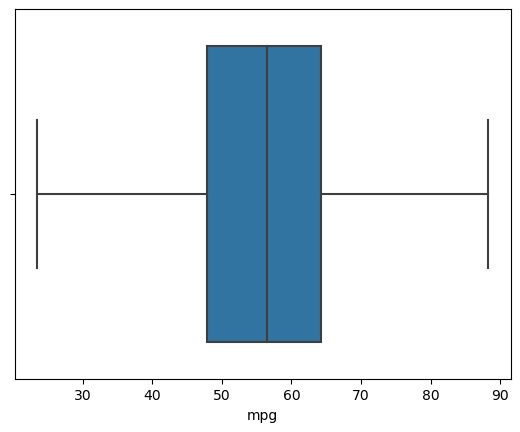

In [216]:
# Looking at the central tendency and spread of the cars' mpgs after applying IQR
sns.boxplot(x=df['mpg']) 

In [217]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_engineSize = df['engineSize'].quantile(0.25)
Q3_engineSize = df['engineSize'].quantile(0.75)
IQR_engineSize = Q3_engineSize - Q1_engineSize

df = df[(df['engineSize'] > Q1_engineSize - 1.5 * IQR_engineSize) & (df['engineSize'] < Q3_engineSize + 1.5 * IQR_engineSize)]

<Axes: xlabel='engineSize'>

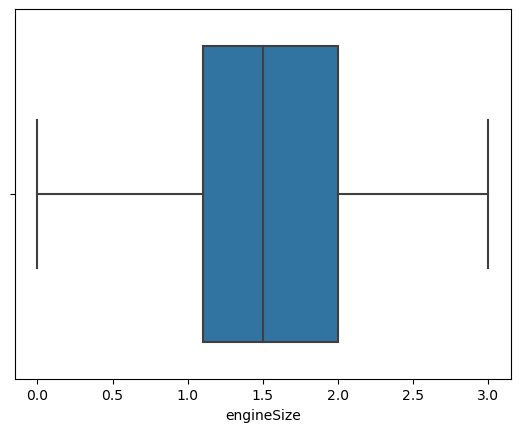

In [218]:
# Looking at the central tendency and spread of the cars' engine sizes after applying IQR
sns.boxplot(x=df['engineSize'])

# Label Encoder

In [219]:
# Initialize a LabelEncoder object
encoder = LabelEncoder()

In [220]:
# Encode 'brand' column and create a mapping dictionary
df['brand'] = encoder.fit_transform(df['brand'])
brand_mapping = {index : label for index, label in enumerate(encoder.classes_)}
brand_mapping

{0: 'Audi', 1: 'BMW', 2: 'Ford', 3: 'Toyota'}

In [221]:
# Encode 'model' column and create a mapping dictionary
df['model'] = encoder.fit_transform(df['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' 1 Series',
 1: ' 2 Series',
 2: ' 3 Series',
 3: ' 4 Series',
 4: ' 5 Series',
 5: ' 6 Series',
 6: ' 7 Series',
 7: ' 8 Series',
 8: ' A1',
 9: ' A3',
 10: ' A4',
 11: ' A5',
 12: ' A6',
 13: ' A7',
 14: ' A8',
 15: ' Auris',
 16: ' Avensis',
 17: ' Aygo',
 18: ' B-MAX',
 19: ' C-HR',
 20: ' C-MAX',
 21: ' Camry',
 22: ' Corolla',
 23: ' EcoSport',
 24: ' Edge',
 25: ' Fiesta',
 26: ' Focus',
 27: ' GT86',
 28: ' Galaxy',
 29: ' Grand C-MAX',
 30: ' Grand Tourneo Connect',
 31: ' Hilux',
 32: ' IQ',
 33: ' KA',
 34: ' Ka+',
 35: ' Kuga',
 36: ' Land Cruiser',
 37: ' M2',
 38: ' M3',
 39: ' M4',
 40: ' Mondeo',
 41: ' Mustang',
 42: ' PROACE VERSO',
 43: ' Prius',
 44: ' Puma',
 45: ' Q2',
 46: ' Q3',
 47: ' Q5',
 48: ' Q7',
 49: ' Q8',
 50: ' RAV4',
 51: ' RS3',
 52: ' RS4',
 53: ' RS5',
 54: ' S-MAX',
 55: ' S3',
 56: ' S4',
 57: ' S5',
 58: ' SQ5',
 59: ' Supra',
 60: ' TT',
 61: ' Tourneo Connect',
 62: ' Tourneo Custom',
 63: ' Transit Tourneo',
 64: ' Urban Cruiser',
 65: '

In [222]:
# Encode 'transmission' column and create a mapping dictionary
df['transmission'] = encoder.fit_transform(df['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Other', 3: 'Semi-Auto'}

In [223]:
# Encode 'fuelType' column and create a mapping dictionary
df['fuelType'] = encoder.fit_transform(df['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Electric', 2: 'Hybrid', 3: 'Other', 4: 'Petrol'}

# Models

In [224]:
x = df.drop('price', axis=1)
y = df['price']

In [225]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.         0.10666667 0.625      0.33333333 0.22639826 1.
  0.26315789 0.48188976 0.46666667]
 [0.         0.16       0.5        0.         0.52091457 0.
  0.03508772 0.62047244 0.66666667]
 [0.         0.10666667 0.5        0.33333333 0.43088191 1.
  0.05263158 0.48188976 0.46666667]
 [0.         0.13333333 0.625      0.         0.3734118  0.
  0.25438596 0.66929134 0.66666667]
 [0.         0.12       0.875      0.33333333 0.02873505 1.
  0.25438596 0.39055118 0.33333333]
 [0.         0.10666667 0.5        0.         0.46417831 1.
  0.05263158 0.53700787 0.46666667]
 [0.         0.12       0.375      0.33333333 0.66349627 1.
  0.03508772 0.55590551 0.46666667]
 [0.         0.10666667 0.5        0.33333333 0.32303553 1.
  0.05263158 0.48188976 0.46666667]
 [0.         0.12       0.625      0.33333333 0.4166223  1.
  0.25438596 0.53700787 0.46666667]
 [0.         0.16       0.5        0.         0.75106839 0.
  0.21929825 0.51653543 0.66666667]]
y 
 0     12500
1     16500
2     1

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=0)

In [227]:
print("x_train shape is:",x_train.shape)

x_train shape is: (32537, 9)


In [228]:
print("x_test shape is:",x_test.shape)

x_test shape is: (10000, 9)


In [229]:
print("y_train shape is:",y_train.shape)

y_train shape is: (32537,)


In [230]:
print("y_test shape is:",y_test.shape)

y_test shape is: (10000,)


In [231]:
LinearRegressionModel = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(x_train, y_train)

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
print('----------------------------------------------------')

y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.8041234033141688
Linear Regression Test Score is :  0.8079044860039015
Linear Regression Coef is :  [-1.92548938e+03  5.13295387e+01  2.05282469e+03  1.35122232e+02
 -9.96448574e-02 -1.15437628e+02 -2.05621124e+01 -1.59373426e+02
  8.74161661e+03]
Linear Regression intercept is :  -4123198.0536913914
----------------------------------------------------
Predicted Value for Linear Regression is :  [18085.19032634  8459.82885487 15338.9515217   7753.95706834
 36055.31815042 25145.10970041 14132.97388634  6818.50169489
  6123.44810645 17212.54596281]


In [232]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9697310420142558
Random Forest Regressor Test Score is :  0.9585803158606746
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [17262.29216478  9930.35372401  9199.37626896  8644.74123959
 34773.56030884 22484.07353185 11084.44245706  9327.94555151
  7584.0712079  15453.28665795]


In [233]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=11,random_state=33)
DecisionTreeRegressorModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')
y_pred = DecisionTreeRegressorModel.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

DecisionTreeRegressor Train Score is :  0.9633530362526085
DecisionTreeRegressor Test Score is :  0.9414713244528926
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [16839.81646424  9983.86134454  8152.24545455  8630.44366197
 35885.17647059 22640.76388889 11258.4893617   8962.95512821
  7499.86956522 13185.08695652]
